In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
plt.ion()

In [16]:
with open('./data/filtered-events.log') as ff:
    data = ff.readlines()
data = [json.loads(ii.strip()) for ii in data]
data = pd.DataFrame.from_records(data)
data['duration_log'] = data['duration'].apply(np.log)

# Describe data

In [3]:
data.head()

,duration,timestamp,type,user
0,2269.854928,1515716140957,login.success,jh-load-test4-7qdrn13
1,2555.225535,1515716141398,login.success,jh-load-test4-7qdrn21
2,487.400497,1515716141448,server-start.success,jh-load-test4-7qdrn13
3,11.762494,1515716141460,kernel-start.success,jh-load-test4-7qdrn13
4,2359.208245,1515716141571,login.success,jh-load-test4-7qdrn96


In [4]:
data['type'].value_counts()

code-execute.success     26277
code-execute.complete      100
kernel-stop.success        100
kernel-start.success       100
login.success              100
server-stop.success        100
server-start.success        94
server-start.failed          6
Name: type, dtype: int64

In [5]:
data['user'].unique().shape

(100,)

In [6]:
# Actions per user
data.groupby('user').count().mean()

duration     267.77
timestamp    268.77
type         268.77
dtype: float64

# Plots and stats

In [7]:
sns.set(font_scale=1.2, style="white")

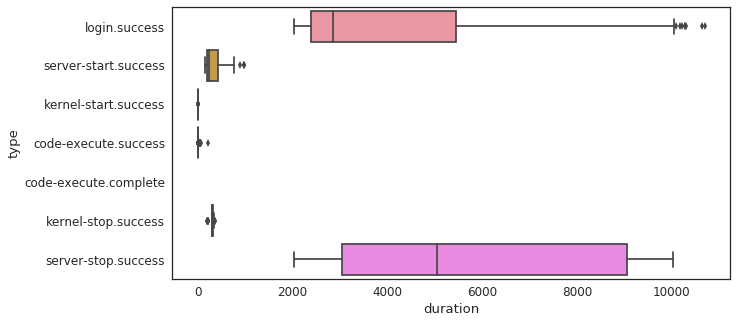

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data.query('type != "server-start.failed"'), x='duration', y='type')

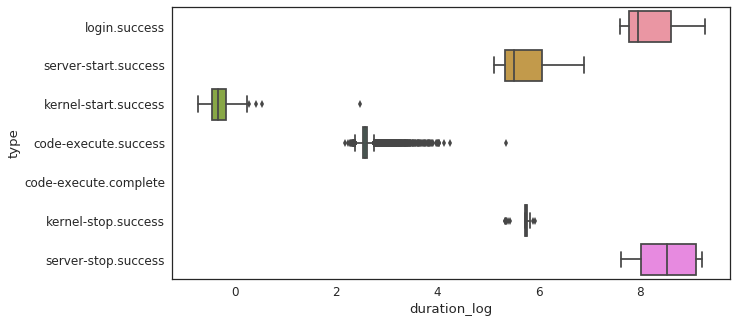

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data.query('type != "server-start.failed"'), x='duration_log', y='type')